## UNSUPERVISED 
CLUSTERING 
k-means for clustering problems 

Unsupervised learning problems can be further grouped into clustering and association problems.

Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
Association:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

Unsupervised: All data is unlabeled and the algorithms learn to inherent structure from the input data.


Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique

Clustering:

K-Means Clustering: Use K-Means clustering to group similar countries based on their features. You can determine the optimal number of clusters using techniques like the elbow method or silhouette score.
Hierarchical Clustering: Apply hierarchical clustering to create a dendrogram and identify natural clusters within the data. You can then cut the dendrogram at an appropriate level to obtain clusters.



In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [3]:
## load the data
df = pd.read_csv(r"country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [19]:
# Reset index of cluster_analysis DataFrame
cluster_analysis.reset_index(inplace=True)

# Identify the cluster(s) containing countries with the highest need for help
cluster_in_need = cluster_analysis.loc[cluster_analysis['cluster_label'].idxmin(), 'cluster_label']
countries_in_need = df[df['cluster_label'] == cluster_in_need]

# Display or further process the identified countries
print(countries_in_need)


                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster_label  
0         9.44        56.2       5.82    553     

In [25]:

# Define numerical and categorical columns
numerical_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
categorical_cols = ['country']  # You can add more categorical columns if needed

In [26]:
# Scale numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_cols])

In [27]:

# Apply k-means clustering to numerical data
kmeans = KMeans(n_clusters=3)
num_clusters = kmeans.fit_predict(scaled_numerical_data)

/Users/thuy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("country-data.csv")  

# Define numerical and categorical columns
numerical_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
categorical_cols = ['country']  # You can add more categorical columns if needed

# Scale numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_cols])

# Apply k-means clustering to numerical data
kmeans = KMeans(n_clusters=3)
num_clusters = kmeans.fit_predict(scaled_numerical_data)

# Custom categorical clustering approach (assign each category a numerical value)
cat_cluster_mapping = {cat: i for i, cat in enumerate(data[categorical_cols].values.ravel())}
data['cat_cluster'] = data[categorical_cols].replace(cat_cluster_mapping)

# Combine numerical and categorical clusters
data['final_cluster'] = num_clusters + data['cat_cluster']

# Analyze the clusters
cluster_info = data.groupby('final_cluster').mean()

# Print cluster information
print("Cluster Information:")
print(cluster_info)

# Determine which clusters have the highest need for help based on your criteria


/Users/thuy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


TypeError: Could not convert Albania to numeric

In [12]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame containing the data
# Select relevant features for clustering
features = ['child_mort', 'income', 'gdpp']  # Add other relevant features as needed

# Preprocess the data (e.g., scale/normalize)
X = df[features]

# Initialize and fit KMeans clustering
kmeans = KMeans(n_clusters=2)  # Choose appropriate value of K
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_

# Analyze clusters and identify countries in need of help
cluster_analysis = df.groupby('cluster_label').mean()
# Identify the cluster(s) containing countries with the highest need for help
cluster_in_need = cluster_analysis.idxmin()  # Use appropriate criteria based on your interpretation
countries_in_need = df[df['cluster_label'] == cluster_in_need]

# Display or further process the identified countries
print(countries_in_need)


/Users/thuy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


TypeError: Could not convert AfghanistanAlbaniaAlgeriaAngolaAntigua and BarbudaArgentinaArmeniaAzerbaijanBahamasBangladeshBarbadosBelarusBelizeBeninBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBulgariaBurkina FasoBurundiCambodiaCameroonCape VerdeCentral African RepublicChadChileChinaColombiaComorosCongo, Dem. Rep.Congo, Rep.Costa RicaCote d'IvoireCroatiaCzech RepublicDominican RepublicEcuadorEgyptEl SalvadorEquatorial GuineaEritreaEstoniaFijiGabonGambiaGeorgiaGhanaGrenadaGuatemalaGuineaGuinea-BissauGuyanaHaitiHungaryIndiaIndonesiaIranIraqJamaicaJordanKazakhstanKenyaKiribatiKyrgyz RepublicLaoLatviaLebanonLesothoLiberiaLibyaLithuaniaMacedonia, FYRMadagascarMalawiMalaysiaMaldivesMaliMaltaMauritaniaMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoMozambiqueMyanmarNamibiaNepalNigerNigeriaPakistanPanamaParaguayPeruPhilippinesPolandPortugalRomaniaRussiaRwandaSamoaSenegalSerbiaSeychellesSierra LeoneSlovak RepublicSloveniaSolomon IslandsSouth AfricaSouth KoreaSri LankaSt. Vincent and the GrenadinesSudanSurinameTajikistanTanzaniaThailandTimor-LesteTogoTongaTunisiaTurkeyTurkmenistanUgandaUkraineUruguayUzbekistanVanuatuVenezuelaVietnamYemenZambia to numeric

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()  # Create a MinMaxScaler object
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Standardization
scaler = StandardScaler()  # Create a StandardScaler object
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

ValueError: could not convert string to float: 'Afghanistan'

<Axes: >

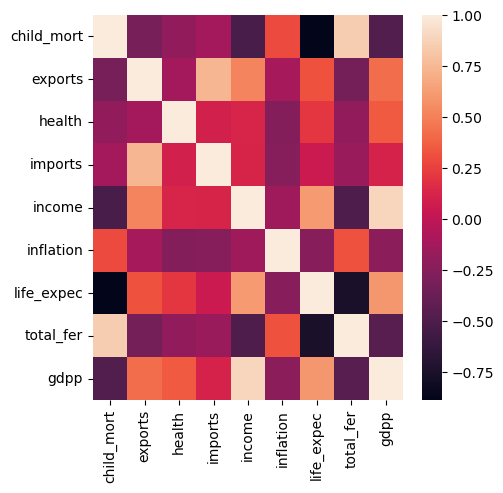

In [9]:
corr_mat = df.corr(numeric_only=True)
corr_mat
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, annot=False)

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, method='ward')  # You can choose different linkage methods

# Plot the dendrogram
plt.figure(figsize=(8,8))
dendrogram(Z, orientation='top', truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

ValueError: could not convert string to float: 'Afghanistan'